# Zpracování obrázku
Import potřebných knihoven a načtení obrázku z lokálního disku do proměnné.

In [5]:
from google.colab import files  #pro praci se soubory
import numpy as np              #pro praci s maticemi
import matplotlib.image as img  #pro praci s obrazky
import matplotlib.pyplot as plt #pro vykreslovani
import matplotlib.cm as cm      #pro premapovani obrazoveho spektra obrazku pri vykreslovani


readed_file = files.upload()    #nacteni obrazku z lokalniho disku do promenne

Saving ColorMixing.png to ColorMixing.png


Nyní je potřeba vybrat z načtených obrázků jeden, se kterým budeme dále pracovat.

In [6]:
#vypsani klicu slovniku nactenych obrazku
print('Vyber nazev z nactenych obrazku... '+str(readed_file.keys()))  

#cyklus pro ulozeni jednoho nacteneho obrazku do promenne picName
while(True):
  picName = input('Zadej jeden z nazvu nactenych obrazku: ')          #zazadani o ucivatelsky vstup
  if(picName in readed_file.keys()):                                  #overeni, zdali byl obrazek zadaneho jmena nacten
    print('Ke zpracovani vybran obrazek: '+picName)                   #Vypsani, ze obrazek byl vybran z klicu slovniku a ukonceni while cyklu
    break
  else:
    print('Zadan soubor, ktery nebyl nacten.\nZadej znovu...')        #pri nespravnem uzivatelskem vstupu se cyklus opakuje stale dokola

Vyber nazev z nactenych obrazku... dict_keys(['ColorMixing.png'])
Zadej jeden z nazvu nactenych obrazku: ColorMixing.png
Ke zpracovani vybran obrazek: ColorMixing.png


## RGB vsuvka (bitová hloubka a skládání barev)
>Než rozložíme obrázek na barevná spektra, je nutné pochopit, co se nám zobrazí.

>RGB obrázek si lze představit jako jeho tři jednotlivá barevná spektra položená na sebe. (**R**-red, **G**-green, **B**-blue)

>Každý jeden pixel pak má svou hodnotu ve spektru R, G a B, aby dohromady vzájemným mixováním vytvořili požadovanou barvu.

>Standartně se RGB obrázek chová jako displej z RGB diod, kde čím větší číslo, tím větší jas té dané barvy. Tím se pak rozsvícením všech barev na maximum dostaneme k bílé a vypnutím k černé jako na následujícím obrázku.

>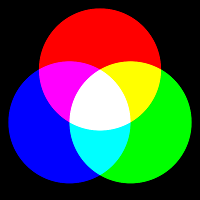

>Pro lepší znázornění však bude lepší tento standart invertovat, aby bylo vidět, kolik barvy dané místo obsahuje. Pokud ale chcete vidět následující obrázky ve standartním RGB režimu, upravte vykreslovací řádky do tohoto tvaru `plt.imshow(matrix,cmap=cm.Barva`**_r**`)`

>Jemnost mixování barev je dána počtu vzorků intenzity barvy. Vezmeme-li, že například intenzitu červené barvy rozdělíme na 10 vzorků, dostaneme následující obrázek.

>Pokud změníte `numberOfSteps` na vyšší hodnotu, sledujte, jak se bude měnit barevná paleta spekter.

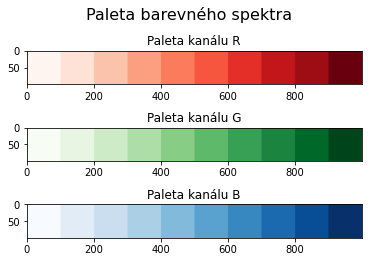

Upravena matice podle nastaveneho poctu casti.
[[  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]
 ...
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]]


In [10]:
#vytvoreni matice plne nul jako zakladni platno pro nasledujici kresleni
matrix = np.zeros([100,1000])

numberOfSteps = 10                                     #MENIT ZDE idealne po 5ti (pouze delitele 1000 bez zbytku)-pocet kroku mezi 0% a 100% intenzity barvy
step=int(1000/(numberOfSteps))                         #vypocteni sirky kroku na stupnici 0-1000

vektor = np.linspace(0,255,numberOfSteps)              #vytvoreni vektoru s rovnomernym rozlozenim mezi 0 a 255 (8bitova presnost

#cyklus vykreslujici vertikalni pruhy pomoci matice
for i in range(numberOfSteps):
  matrix[:,i*step:i*step+step] = int(vektor[i])

#vykresleni dane matice s postupnym pouzitim RGB
plt.subplots(3,1)
plt.suptitle('Paleta barevného spektra',fontsize=16)
plt.subplot(3,1,1)
plt.imshow(matrix,cmap=cm.Reds)
plt.title('Paleta kanálu R')
plt.subplot(3,1,2)
plt.imshow(matrix,cmap=cm.Greens)
plt.title('Paleta kanálu G')
plt.subplot(3,1,3)
plt.imshow(matrix,cmap=cm.Blues)
plt.title('Paleta kanálu B')
plt.show()
print('Upravena matice podle nastaveneho poctu casti.')
print(matrix)

>Výše zobrazené palety objasňují tzv. bitovou hloubku barvy.

>Pokud máme standartní bitovou hloubku 8bitů, znamená to, že máme 2^8=256 stupňů barev. Při vyšší bitové hloubce pak tedy dostáváme možnost pracovat s více barvami a vytvářet jemnější barevné přechody.

>Nyní tedy můžeme rozložit vložený obrázek na barevná spektra

## Rozklad na jednotlivá spektra RGB

Rozmery nacteneho obrazku jsou: 
	vyska= 200px
	sirka= 200px
	pocet spekter= 4


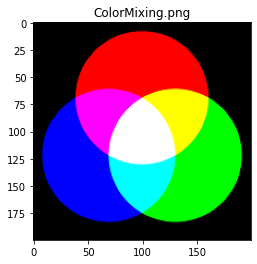

Obrazek reprezentovany multidimenzionalni matici...
R-red
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
G-green
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
B-blue
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
imageInArray = img.imread(picName)      #nacteni obrazku do matice
dimensions = np.shape(imageInArray)     #zjisteni rozmeru nactene matice
print('Rozmery nacteneho obrazku jsou: '+'\n\tvyska= '+str(dimensions[0])+'px'+'\n\tsirka= '+str(dimensions[1])+'px'+'\n\tpocet spekter= '+str(dimensions[2]))

#vytvoreni kopii jednotlivych spekter obrazku, aby jsme neposkodili nacteny original
spectrum_red = np.copy(imageInArray[:,:,0])
spectrum_green = np.copy(imageInArray[:,:,1])
spectrum_blue = np.copy(imageInArray[:,:,2])

#zobrazeni matice reprezentujici nacteny obrazek
plt.imshow(imageInArray)
plt.title(picName)
plt.show()

#zobrazeni jednotlivych barevnych spekter matice obrazku v cislech
print('Obrazek reprezentovany multidimenzionalni matici...')
print('R-red\n'+str(spectrum_red))
print('G-green\n'+str(spectrum_green))
print('B-blue\n'+str(spectrum_blue))

>Nyní obrázek rozdělený na kopie barevných spekter v předchozím kroku z původního barevného "sandwiche" vykreslíme jak v souvisejících barvách (`spectrum_red` - červeně), tak černobíle (tak jak obrázek vidí počítač a zpracovává ho).

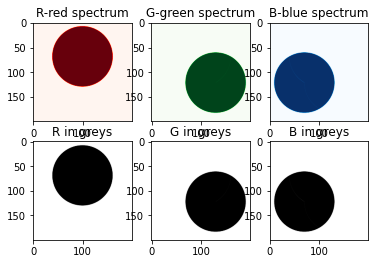

In [12]:
#Vykresleni jednotlivych barevnych spekter a jejich cernobilou verzi pri zobrazeni odstiny sede
#opet lze pro standartni zobrazeni RGB spektra pridat '_r' do vyznacenych radku symboly '###'


#ZOBRAZENI V NATIVNICH BARVACH
plt.subplot(2, 3, 1)
plt.imshow(spectrum_red,cmap=cm.Reds)###
plt.title('R-red spectrum')

plt.subplot(2, 3, 2)
plt.imshow(spectrum_green, cmap=cm.Greens)###
plt.title('G-green spectrum')

plt.subplot(2, 3, 3)
plt.imshow(spectrum_blue, cmap=cm.Blues)###
plt.title('B-blue spectrum')

#ZOBRAZENI V ODSTINECH SEDI
plt.subplot(2, 3, 4)
plt.imshow(spectrum_red,cmap=cm.Greys)###
plt.title('R in greys')

plt.subplot(2, 3, 5)
plt.imshow(spectrum_green,cmap=cm.Greys)###
plt.title('G in greys')

plt.subplot(2, 3, 6)
plt.imshow(spectrum_blue,cmap=cm.Greys)###
plt.title('B in greys')

plt.show()

## Demonstrace možnosti práce s obrázkem jako maticí

>Převedení jednoho spektra obrázku na vektor a zpět. Ai algoritmy pracují s obrázkem jako vektorem, protože je to výpočetně jednodušší a rychlejší narozdíl od práce s numpy maticí. Pěkně je to vyvětleno v následujícím videu: [Strojové učení](https://youtu.be/1BneqPdEhMM?t=484)

>Následně jako demonstraci, že obrázek převedený do vektoru (pole) lze zpětně rekonstruovat do originálu, převedeme na matici se známými rozměry.

>Případně je možné pro experimenty zkusit změnit výšku a šířku. Je však nutné zachovat stejný počet pixelů (počet pixelů šířky **x** počet pixelů výšky)

>Pro demonstraci bylo použito červené spektrum. Stejný princip však funguje i pro ostatní spektra. Lze to ověřit jednoduchým zkopírováním kódu a změnou proměnných.

Matice prevedena na vektor
Velikost vektoru: 40000

[0. 0. 0. ... 0. 0. 0.]
Vektor prevedeny zpet na matici
Rozmery matice: (200, 200)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<function matplotlib.pyplot.show>

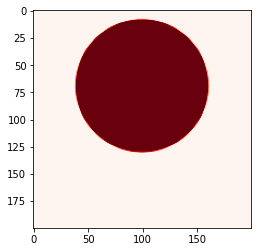

In [13]:
#prevedeni matice R-spektra na vektor
redAsArray = np.matrix.flatten(spectrum_red)
print('Matice prevedena na vektor')
print('Velikost vektoru: '+str(len(redAsArray))+'\n')
print(redAsArray)

#prevedeni vektoru zpet na matici o danych rozmerech (ktere je nutne si pamatovat)
arrayAsMatrix=redAsArray.reshape(dimensions[0],dimensions[1])
print('Vektor prevedeny zpet na matici')
print('Rozmery matice: '+ str(arrayAsMatrix.shape)+ '\n')

#zobraceni matice poskladane z vektoru
print(arrayAsMatrix)
plt.imshow(arrayAsMatrix,cmap=cm.Reds)
plt.show